In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
rcParams['text.usetex'] = True
plt.rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

In [17]:
import json
with open('../data/all.json', 'r') as f:
    results = json.load(f)

In [18]:
model_mapper = {
    "o3-mini--high": r"\textsc{o3-mini}",
    "o1": r"\textsc{o1}",
    "gemini-2.0-flash-thinking-exp": r"\textsc{Flash-Thinking}",
    # "o1-mini": r"\textsc{o1-mini}",
    "deepseek-ai__DeepSeek-R1-Distill-Llama-70B": r"\textsc{R1-70B}",
    # "gemini-2.0-flash-exp": r"\textsc{Flash}",
    "claude-3-5-sonnet-latest": r"\textsc{3.5-Sonnet}",
    # "Qwen__QwQ-32B-Preview": r"\textsc{QwQ}",
    # "gpt-4o": r"\textsc{GPT-4o}",
}

In [ ]:
model_scores = dict()

for model in model_mapper.keys():
    
    if model in ["gpt-4o", "claude-3-5-sonnet-latest", "gemini-2.0-flash-exp"]:
        run = results[1]
    else:
        run = results[0]
    acc = run["model_results"][model]["avg_acc"]
    all_acc = run["model_results"][model]["all_correct"]
    model_scores[model_mapper[model]] = (acc, all_acc)

In [20]:
model_scores

{'\\textsc{o3-mini}': (0.6053719008264463, 0.4214876033057851),
 '\\textsc{o1}': (0.453168044077135, 0.24793388429752067),
 '\\textsc{Flash-Thinking}': (0.2878787878787879, 0.12396694214876033),
 '\\textsc{R1-70B}': (0.21143250688705234, 0.09090909090909091),
 '\\textsc{3.5-Sonnet}': (0.17630853994490356, 0.08264462809917356)}

<>:97: SyntaxWarning: invalid escape sequence '\%'
<>:97: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1436547/3310247414.py:97: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i * 20}\%$' for i in range(6)])
/tmp/ipykernel_1436547/3310247414.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] * len(ax.get_xticks()))


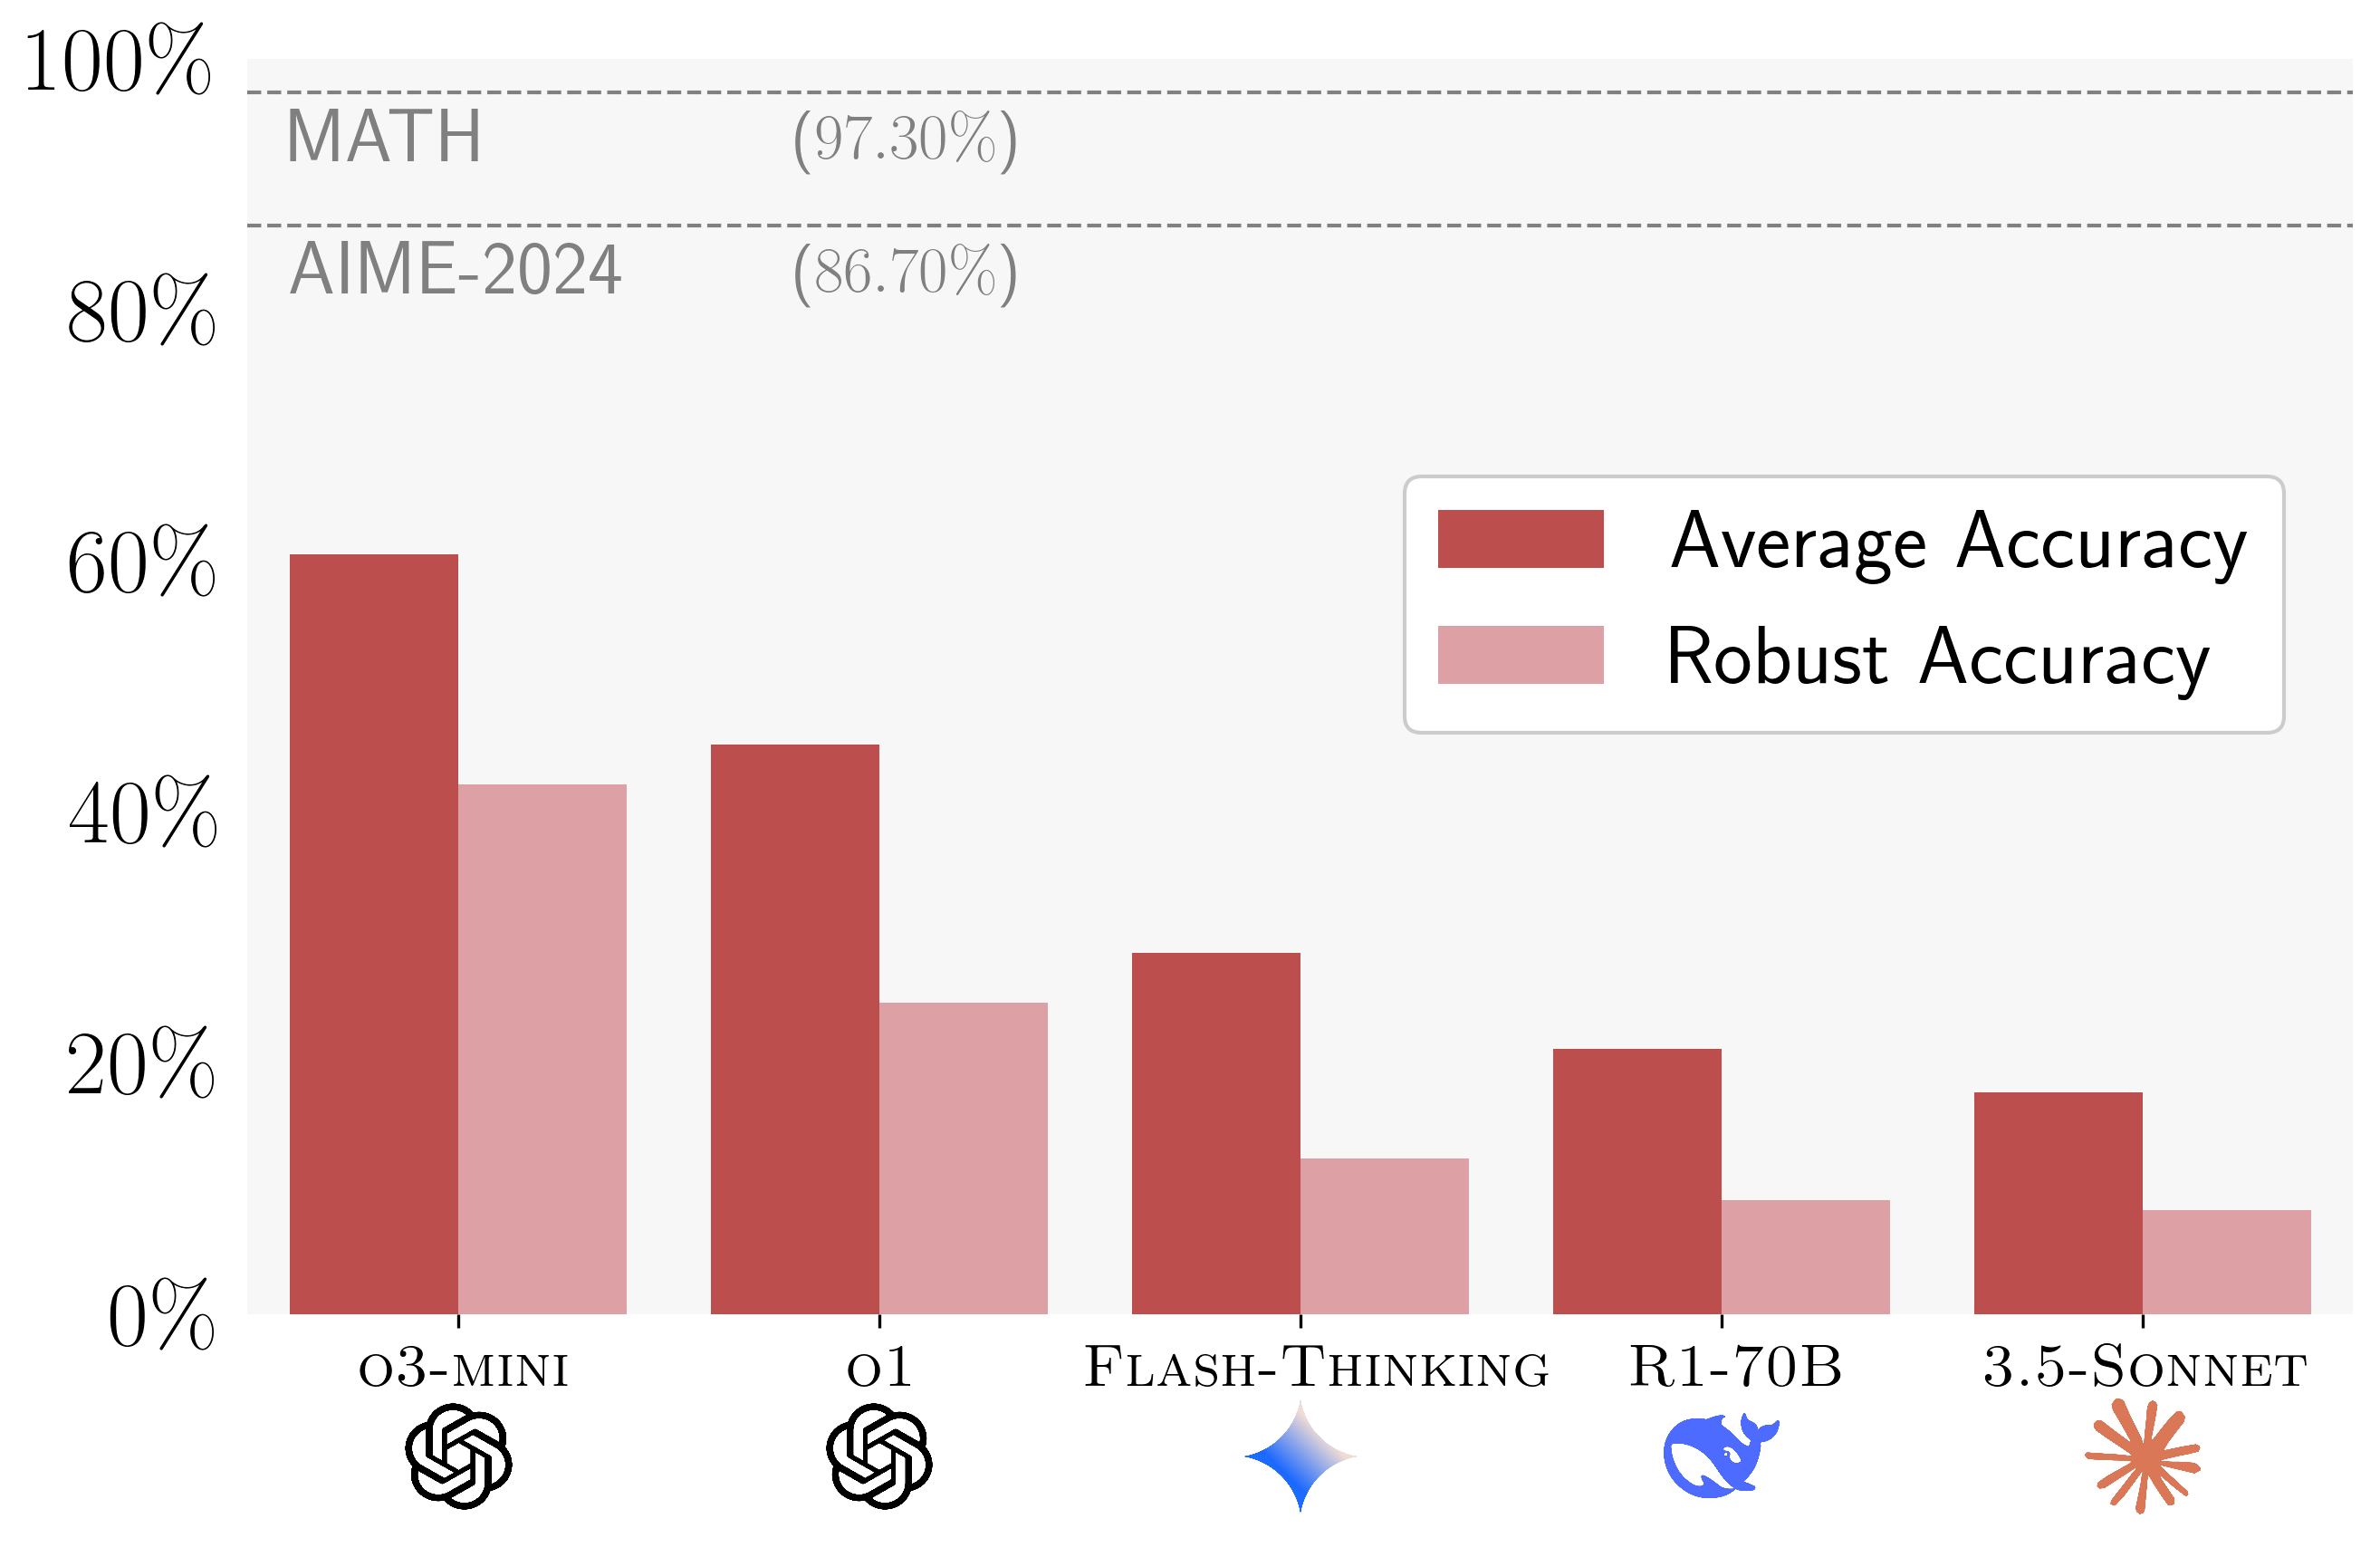

In [ ]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Average Accuracy', 'Robust Accuracy'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Model'}, inplace=True)
df_melted = df.melt(id_vars='Model', var_name='Accuracy Type', value_name='Accuracy Value')
sns.barplot(data=df_melted, x='Model', y='Accuracy Value', hue='Accuracy Type',
            # palette=["#1f77b4", "#aec7e8"],
            palette=["#cf3b3b", "#e7969c"]
            )

# rotate x labels
# plt.xticks(rotation=35, ha="right")
ax.set_xticklabels([''] * len(ax.get_xticks()))
x_positions = ax.get_xticks()  # The x locations of each bar group
models = df['Model'].unique()

get_png = {
    "o3-mini--high": ("openai.png", -0.03, 0),
    "o1": ("openai.png", 0.01, 0.08),
    "gemini-2.0-flash-thinking-exp": ("gemini.png", 0.0, 0.04),
    "deepseek-ai__DeepSeek-R1-Distill-Llama-70B": ("deepseek.png", 0.04, 0.00),
    "claude-3-5-sonnet-latest": ("claude.png", -0.03, 0),

    # "Qwen__QwQ-32B-Preview": ("qwen.png", 0.07, 0.07),
}
get_png = {
    model_mapper[k]: v for k, v in get_png.items()
}

for x, model_name in zip(x_positions, models):
    if model_name in get_png:
        # Read the PNG file
        arr_img = mpimg.imread(get_png[model_name][0])
        # Scale down the image for a better fit
        imagebox = OffsetImage(arr_img, zoom=0.03)
        ab = AnnotationBbox(
            imagebox, 
            (x, -0.16),           # place at x, near 0 (the bottom)
            frameon=False, 
            xycoords=('data', 'axes fraction'),  # x in data coords, y in fraction of y-axis
            box_alignment=(0.5, 0)               # anchor the image center at the bottom center
        )
        
        # Add it to the axes
        ax.add_artist(ab)
    
    # Optionally, add text below or next to the image
    # For example, rotate the text and place it slightly below the x-axis
    ax.text(
        x + 0.043 * len(model_name[8:-1]) + get_png[model_name][1], 
        -0.025,  # shift downward from 0 (in axes fraction) to avoid overlapping with bar
        model_name, 
        ha='right', 
        va='top', 
        fontsize=16,
        transform=ax.get_xaxis_transform()  # so it stays under the tick, not in data coords
    )

# draw a grey dotted line at 60.54
# plt.axhline(y=0.6054, color='grey', linestyle='--', lw=1)
# same at 79.8
plt.axhline(y=0.867, color='grey', linestyle='--', lw=1)
# same at 97.8
plt.axhline(y=0.973, color='grey', linestyle='--', lw=1)

# put grey text below the lines
# plt.text(-0.4, 0.5654, r'Omni-MATH', color='grey', fontsize=20, va='center')
# plt.text(0.8, 0.5654, r" ($60.54\%$)", color='grey', fontsize=17, va='center')
plt.text(-0.4, 0.827, r'AIME-2024', color='grey', fontsize=20, va='center')
plt.text(0.8, 0.827, r" ($86.70\%$)", color='grey', fontsize=17, va='center')
plt.text(-0.4, 0.933, r'MATH', color='grey', fontsize=20, va='center')
plt.text(0.8, 0.933, r" ($97.30\%$)", color='grey', fontsize=17, va='center')

# plt.axhline(y=0.2, color='grey', linestyle='--', lw=1, zorder=-1)
# plt.axhline(y=0.4, color='grey', linestyle='--', lw=1, zorder=-1)



# set font size of labels, ticks, and legend
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='both', which='major', labelsize=24)
# put the legend at 4, 40
leg = plt.legend(loc='upper left', bbox_to_anchor=(0.53, 0.7), fontsize=22)
leg.get_frame().set_alpha(1)

plt.tick_params(axis='y', which='both', left=False, right=False)
sns.despine(left=True, bottom=True)
# set background color to grey
ax.set_facecolor((0.97,0.97,0.97))

ax.set_yticks([i / 5 for i in range(6)])
ax.set_yticklabels([f'${i * 20}\%$' for i in range(6)])
# ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
# ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements

ax.set_ylim(0,1)

fig.savefig('numbers_overview.pdf', bbox_inches='tight')

In [41]:
model_mapper = {
    "o1": r"\textsc{o1}",
    "gemini-2.0-flash-exp": r"\textsc{Flash}*",
    "o1-mini": r"\textsc{o1-mini}",
    "claude-3-5-sonnet-latest": r"\textsc{3.5-Sonnet}",
    "Qwen__Qwen2.5-72B-Instruct-Turbo": r"\textsc{Qwen-2.5-72B}",
    "Qwen__QwQ-32B-Preview": r"\textsc{QwQ}",
    "gpt-4o": r"\textsc{GPT-4o}",
    # "gpt-4o-mini": r"\textsc{GPT-4o-mini}",
    # "meta-llama__Meta-Llama-3.1-8B-Instruct-Turbo-128K": r"\textsc{Llama-3.1-8B}",
    "claude-3-5-haiku-latest": r"\textsc{3.5-Haiku}",
    'meta-llama__Llama-3.3-70B-Instruct-Turbo': r"\textsc{Llama-3.3-70B}",
    
}

<>:74: SyntaxWarning: invalid escape sequence '\%'
<>:74: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1436547/1703025920.py:74: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i}\%$' for i in (4,8,12,16,20)])


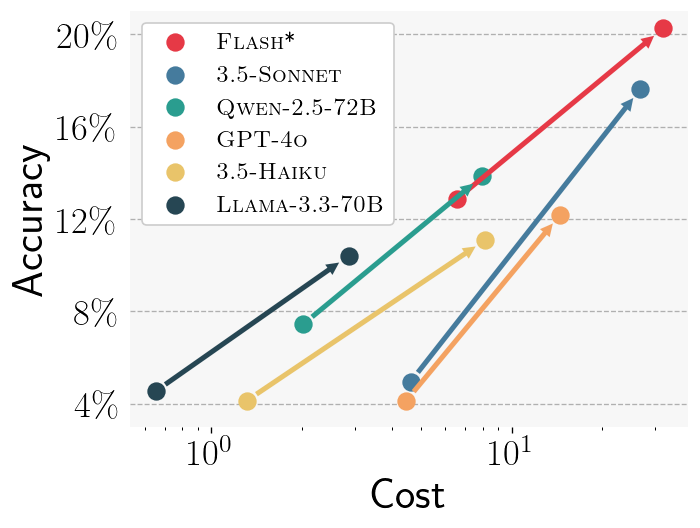

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch

fig, ax = plt.subplots(figsize=(6, 4.5), dpi=120)

model_names = list(set(results[0]["model_results"].keys()).intersection(
    set(results[1]["model_results"].keys())
).intersection(set(model_mapper.keys())))

# sort by index in model_mapper
model_names = sorted(model_names, key=lambda x: list(model_mapper.keys()).index(x))

points_for_models = dict()

for model_name in model_names:
    points = []
    for i, run in enumerate(results):
        acc = run["model_results"][model_name]["avg_acc"] * 100
        all_acc = run["model_results"][model_name]["avg_cost"]
        if "gemini" in model_name:
            all_acc *= 5 # 1.5 Pro estimate
        points.append((all_acc, acc))
    points_for_models[model_name] = points

palette_colors = [
    "#E63946",  # Bright Red
        "#457B9D",  # Muted Blue
    "#2A9D8F",  # Teal
    "#F4A261",  # Warm Orange

    "#E9C46A",  # Golden Yellow
    "#264653",  # Deep Blue-Gray

    "#1D3557",  # Dark Navy
    "#A8DADC",  # Soft Cyan
    "#F94144"   # Strong Red-Orange
]

for model_name, points in points_for_models.items():
    color = palette_colors.pop(0)
    x, y = zip(*points)

    # Scatter the points
    ax.scatter(x, y, label=model_mapper[model_name], color=color, s=100)
    
    ax.annotate(
        '',
        xy=(x[1], y[1]),
        xytext=(x[0], y[0]),
        arrowprops=dict(
            arrowstyle='simple',       # fancy triangular arrow head
            color=color,
            lw=0.02,
            ls="-",
            alpha=1,
            shrinkA=7, shrinkB=7,
            mutation_scale=15
        )
    )

plt.xlabel('Cost', fontsize=26)
ax.set_ylabel("Accuracy", fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=22)
leg = plt.legend(title='', fontsize=14, loc='upper left')
leg.get_frame().set_alpha(1)

sns.despine(left=True, bottom=True)
ax.set_facecolor((0.97,0.97,0.97))

ax.set_xscale('log')

ax.set_yticks((4,8,12,16,20))
ax.set_yticklabels([f'${i}\%$' for i in (4,8,12,16,20)])
ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements
plt.tick_params(axis='y', which='both', left=False, right=False)
ax.set_ylim(3, 21)
plt.show()
fig.tight_layout()
fig.savefig('cost_vs_accuracy.pdf', bbox_inches='tight')

In [43]:
points_for_models

{'gemini-2.0-flash-exp': [(6.585450000000001, 12.878787878787879),
  (31.84656, 20.24793388429752)],
 'claude-3-5-sonnet-latest': [(4.605873, 4.958677685950414),
  (26.783763, 17.630853994490355)],
 'Qwen__Qwen2.5-72B-Instruct-Turbo': [(2.0200704, 7.43801652892562),
  (7.9657583999999995, 13.842975206611571)],
 'gpt-4o': [(4.4528925, 4.132231404958678), (14.48655, 12.190082644628099)],
 'claude-3-5-haiku-latest': [(1.312028, 4.132231404958678),
  (8.15656, 11.088154269972451)],
 'meta-llama__Llama-3.3-70B-Instruct-Turbo': [(0.65337712, 4.545454545454546),
  (2.86338008, 10.399449035812673)]}

In [59]:
model_mapper = {
    "o3-mini--high": r"\textsc{o3-mini}",
    # "claude-3-5-sonnet-latest": r"\textsc{3.5-Sonnet}",
    "Qwen__QwQ-32B-Preview": r"\textsc{QwQ}",
}

In [60]:
name_mapper = {
    "CheckerTag.CORRECT": "Correct",
    "CheckerTag.INCORRECT_SOLUTION": "Incorrect",
    "CheckerTag.INCORRECT_FORMAT": "Format",
    "CheckerTag.INCORRECT_LENGTH": "Format",
    "Model says no solution exists": "Reject",
    "No Boxed Answer": "No Solution",
    "Error parsing solution": "Unparseable",
}

In [61]:
points_for_models = dict()
results_no_parse = json.load(open('../data/results-no-parse.json', 'r')) 

model_names = list(model_mapper.keys())

before_dict = dict()
after_dict = dict()
for model_name in model_names:
    run_before, run_after = results_no_parse[0], results[0]
    if model_name == "claude-3-5-sonnet-latest":
        run_before, run_after = results_no_parse[1], results[1]
    n_no_sol_to_correct = 0
    n_no_sol_to_incorrect = 0
    for i in range(len(run_before["model_results"][model_name]["detailed_results"])):
        if run_before["model_results"][model_name]["detailed_results"][i]["error"] == "No Boxed Answer" and run_after["model_results"][model_name]["detailed_results"][i]["error"] == "CheckerTag.CORRECT":
            n_no_sol_to_correct += 1
            # print(run_before["model_results"][model_name]["detailed_results"][i])
        if run_before["model_results"][model_name]["detailed_results"][i]["error"] == "No Boxed Answer" and run_after["model_results"][model_name]["detailed_results"][i]["error"] != "CheckerTag.CORRECT":
            n_no_sol_to_incorrect += 1
    print(f"{model_name}: {n_no_sol_to_correct} no solution to correct")
    print(f"{model_name}: {n_no_sol_to_incorrect} no solution to incorrect")
    before_dict[model_mapper[model_name]] = run_before["model_results"][model_name]["error_types"]
    after_dict[model_mapper[model_name]] = run_after["model_results"][model_name]["error_types"]
    before_dict[model_mapper[model_name]] = {name_mapper[k]: 100 * sum([before_dict[model_mapper[model_name]][key] for key in before_dict[model_mapper[model_name]] if name_mapper[k] == name_mapper[key]]) for k in before_dict[model_mapper[model_name]]}
    after_dict[model_mapper[model_name]] = {name_mapper[k]: 100 * sum([after_dict[model_mapper[model_name]][key] for key in after_dict[model_mapper[model_name]] if name_mapper[k] == name_mapper[key]]) for k in after_dict[model_mapper[model_name]]}

for key in name_mapper:
    for model_name in model_names:
        if name_mapper[key] not in before_dict[model_mapper[model_name]]:
            before_dict[model_mapper[model_name]][name_mapper[key]] = 0
        if name_mapper[key] not in after_dict[model_mapper[model_name]]:
            after_dict[model_mapper[model_name]][name_mapper[key]] = 0

o3-mini--high: 46 no solution to correct
o3-mini--high: 60 no solution to incorrect
Qwen__QwQ-32B-Preview: 1 no solution to correct
Qwen__QwQ-32B-Preview: 91 no solution to incorrect


In [62]:
del name_mapper["CheckerTag.INCORRECT_LENGTH"]

<>:78: SyntaxWarning: invalid escape sequence '\%'
<>:78: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1436547/981062472.py:78: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i * 10}\%$' for i in range(7)])


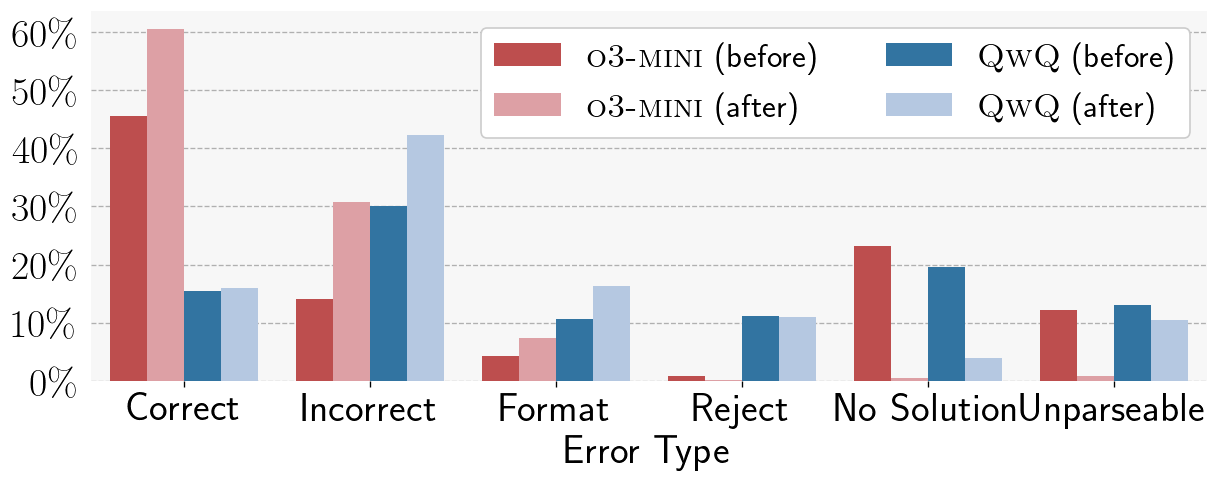

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --------------------------------------------
# Construct a long-form DataFrame for Seaborn
# --------------------------------------------
data = []
for model in before_dict:
    for err_type in name_mapper.values():
        data.append({
            "Model": model,
            "ErrorType": err_type,
            "Period": "before",
            "Count": before_dict[model].get(err_type, 0),
        })
        data.append({
            "Model": model,
            "ErrorType": err_type,
            "Period": "after",
            "Count": after_dict[model].get(err_type, 0),
        })

df = pd.DataFrame(data)

# Create a "Combination" column so each Model+Period gets a distinct color
df["Combination"] = df["Model"] + " (" + df["Period"] + ")"

# --------------------------------------------
# Define a custom palette for each Combination
# (Before = darker shade, After = lighter shade)
# --------------------------------------------

model_mapper = {
    "o3-mini--high": r"\textsc{o3-mini}",
    "claude-3-5-sonnet-latest": r"\textsc{3.5-Sonnet}",
    "Qwen__QwQ-32B-Preview": r"\textsc{QwQ}",
}
palette = {
    r"\textsc{o3-mini} (before)": "#cf3b3b",  # darker blue, 
    r"\textsc{o3-mini} (after)":  "#e7969c",  # lighter blue
    r"\textsc{QwQ} (before)": "#1f77b4",  # darker green
    r"\textsc{QwQ} (after)":  "#aec7e8",  # lighter green
    r"\textsc{3.5-Sonnet} (before)": "#d62728",  # darker red
    r"\textsc{3.5-Sonnet} (after)":  "#ff9896",  # lighter red
}

# ------------------------------------------------
# Create the barplot: x=ErrorType, y=Count, hue=Combination
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.barplot(
    data=df,
    x="ErrorType",
    y="Count",
    hue="Combination",
    palette=palette,
    ax=ax,
    dodge=True,  # ensure grouped bars are separated
    width=0.8
)

# Clean up legend labels to be more descriptive
handles, labels = ax.get_legend_handles_labels()
new_labels = []
for label in labels:
    model_name, period = label.split(" (")
    new_labels.append(f"{model_name} ({period})")

ax.legend(handles, new_labels, title="Model / Period")

plt.ylabel("")
plt.xlabel('Error Type', fontsize=24)
plt.tick_params(axis='y', which='major', labelsize=24)
plt.tick_params(axis='x', which='major', labelsize=24)

ax.set_yticks([i * 10 for i in range(7)])
ax.set_yticklabels([f'${i * 10}\%$' for i in range(7)])

# rotate x labels

# plt.xticks(rotation=15, ha="right")

leg = plt.legend(title='', fontsize=20, loc='upper right', ncol=2)
leg.get_frame().set_alpha(1)

sns.despine(left=True, bottom=True)
ax.set_facecolor((0.97,0.97,0.97))

ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.show()
fig.tight_layout()
plt.show()
fig.savefig('error_types.pdf', bbox_inches='tight')

In [64]:
rephrase_results = json.load(open('../data/rephrase.json', 'r'))

model_names = set(rephrase_results[0]["model_results"].keys()).intersection(results[0]["model_results"].keys())

<>:40: SyntaxWarning: invalid escape sequence '\%'
<>:42: SyntaxWarning: invalid escape sequence '\%'
<>:40: SyntaxWarning: invalid escape sequence '\%'
<>:42: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1436547/1849125277.py:40: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i * 10}\%$' for i in range(4)])
/tmp/ipykernel_1436547/1849125277.py:42: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticklabels([f'${i * 10}\%$' for i in range(4)])


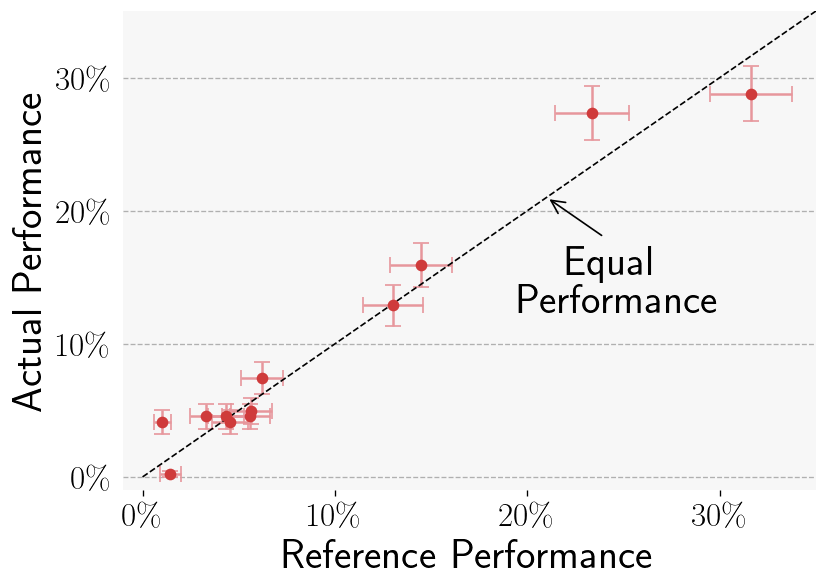

In [ ]:
x = [rephrase_results[0]["model_results"][model_name]["avg_acc"] for model_name in model_names]
x = 100 * np.array(x)
x_uncertainty = [np.sqrt(x_ / 100 * (1 - x_ / 100)) / np.sqrt(480) * 100 for x_ in x]
y = [results[0]["model_results"][model_name]["avg_acc"] for model_name in model_names]
y = 100 * np.array(y)
y_uncertainty = [np.sqrt(y_ / 100 * (1 - y_ / 100)) / np.sqrt(480) * 100 for y_ in y]

fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

ax.errorbar(x, y, xerr=x_uncertainty, yerr=y_uncertainty, fmt='o', color="#cf3b3b", ecolor="#e7969c", capsize=5)

# draw a line at y=x
ax.plot([0, max(max(x), max(y)) + 10], [0, max(max(x), max(y)) + 10], color='black', linestyle='--', lw=1, 
        label='y=x')

# add text to the line
plt.text(22, 16, 'Equal', color='black', fontsize=25, va='center')
plt.text(19.5, 13.2, 'Performance', color='black', fontsize=25, va='center')
# make it an arrow actually
ax.add_patch(FancyArrowPatch((24, 18), (21, 21), arrowstyle='->', mutation_scale=20))

plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)

# rotate x labels

# plt.xticks(rotation=15, ha="right")

# plt.legend(title='', fontsize=22, loc='upper right')
sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements
plt.tick_params(axis='y', which='both', left=False, right=False)

ax.set_xlabel('Reference Performance', fontsize=25)
ax.set_ylabel('Actual Performance', fontsize=25)
ax.set_facecolor((0.97,0.97,0.97))

ax.set_yticks([i * 10 for i in range(4)])
ax.set_yticklabels([f'${i * 10}\%$' for i in range(4)])
ax.set_xticks([i * 10 for i in range(4)])
ax.set_xticklabels([f'${i * 10}\%$' for i in range(4)])

ax.set_ylim(-1, 35)
ax.set_xlim(-1, 35)

fig.tight_layout()
plt.show()
fig.savefig('contamination.pdf', bbox_inches='tight')


In [70]:
from tqdm import tqdm
def check_equal(problem, problem_rephrased):
    return problem["problem_name"] == problem_rephrased["problem_name"] and problem["variation_parameters"] == problem_rephrased["variation_parameters"]

def compute_performance(accuracies):
    # compute mean(mean_{one problem})
    mean_accuracies = []
    unique_problems = set([problem[0] for problem in accuracies])
    for problem in unique_problems:
        mean_accuracies.append(np.mean([float(acc) for prob, acc in accuracies if prob == problem]))
    return np.mean(mean_accuracies)


def stat_test(results, results_rephrased, n_bootstraps=1000):
    np.random.seed(0)
    accuracies = []
    rephrase_accuracies = []
    for problem in results:
        for problem_rephrased in results_rephrased:
            if check_equal(problem, problem_rephrased):
                rephrase_accuracies.append((problem["problem_name"], int(problem_rephrased["correct"])))
                accuracies.append((problem["problem_name"], int(problem["correct"])))
                break

    bootstrap_differences = []
    for _ in tqdm(range(n_bootstraps)):
        indices = np.random.choice(len(accuracies), len(accuracies), replace=True)
        accuracies_here = [accuracies[i] for i in indices]
        rephrase_accuracies_here = [rephrase_accuracies[i] for i in indices]
        bootstrap_differences.append(compute_performance(accuracies_here) - compute_performance(rephrase_accuracies_here))
    
    bootstrap_differences = np.array(bootstrap_differences)
    return (float(np.mean(bootstrap_differences)), 
            float(np.mean(bootstrap_differences) - np.percentile(bootstrap_differences, 2.5)), 
           float(np.mean(bootstrap_differences) - np.percentile(bootstrap_differences, 97.5)))

In [71]:
for model_name in results[0]["model_results"]:
    print(model_name)
    if model_name not in rephrase_results[0]["model_results"]:
        continue
    print(stat_test(results[0]["model_results"][model_name]["detailed_results"], rephrase_results[0]["model_results"][model_name]["detailed_results"]))

deepseek-reasoner
claude-3-5-haiku-latest


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:05<00:00, 188.00it/s]


(0.025744652271080606, 0.017422188502964665, -0.01717404939762106)
meta-llama__Meta-Llama-3.1-8B-Instruct-Turbo-128K


100%|██████████| 1000/1000 [00:05<00:00, 187.47it/s]


(-0.009782671335665166, 0.01122879575116957, -0.012632288193902712)
gpt-4o


100%|██████████| 1000/1000 [00:05<00:00, 198.37it/s]


(-0.0045503869541833825, 0.0167165331571895, -0.016157921415336264)
gpt-4o-mini


100%|██████████| 1000/1000 [00:05<00:00, 197.71it/s]


(-0.010083449381496981, 0.01472635228039585, -0.015435460875749847)
deepseek-ai__DeepSeek-R1
o1-mini


100%|██████████| 1000/1000 [00:05<00:00, 197.37it/s]


(0.03845604401414903, 0.03565497081833903, -0.03482634967096964)
deepseek-ai__DeepSeek-R1-Distill-Llama-70B
gemini-2.0-flash-thinking-exp


100%|██████████| 1000/1000 [00:05<00:00, 194.69it/s]


(-0.03372516508797031, 0.03374961537893907, -0.03431461219057524)
o3-mini
meta-llama__Llama-3.3-70B-Instruct-Turbo


100%|██████████| 1000/1000 [00:05<00:00, 195.26it/s]


(0.010217870351400343, 0.01834277823644087, -0.018037998105176818)
Qwen__QwQ-32B-Preview


100%|██████████| 1000/1000 [00:05<00:00, 189.12it/s]


(0.009814481820225322, 0.03080592669798484, -0.028954070275352847)
o1
meta-llama__Meta-Llama-3.1-405B-Instruct-Turbo


100%|██████████| 1000/1000 [00:05<00:00, 179.68it/s]


(-0.0012621739182115377, 0.022888045380034083, -0.022466234716759625)
claude-3-5-sonnet-latest


100%|██████████| 1000/1000 [00:06<00:00, 163.63it/s]


(-0.0034810447556898358, 0.023019701624366895, -0.02524419964918739)
Qwen__Qwen2.5-72B-Instruct-Turbo


100%|██████████| 1000/1000 [00:05<00:00, 190.08it/s]


(0.012461629333188753, 0.022201967497439953, -0.02496886427370985)
gpt-5--high
o3-mini--high
gemini-2.0-flash-exp


100%|██████████| 1000/1000 [00:05<00:00, 187.17it/s]

(-0.004326538264409418, 0.0296449835717903, -0.027129631572476963)


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:82: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:82: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1436547/524973083.py:2: SyntaxWarning: invalid escape sequence '\c'
  """
/tmp/ipykernel_1436547/524973083.py:82: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i}\%$' for i in (0, 25, 50, 75, 100)])


For k=gold and bucket 0: 52
For k=gold and bucket 1: 79
For k=gold and bucket 2: 78
For k=gold and bucket 3: 78
For k=gold and bucket 4: 77
For k=gold and bucket 5: 78
For k=gold and bucket 6: 78
For k=gold and bucket 7: 78
For k=gold and bucket 8: 78
For k=gold and bucket 9: 52


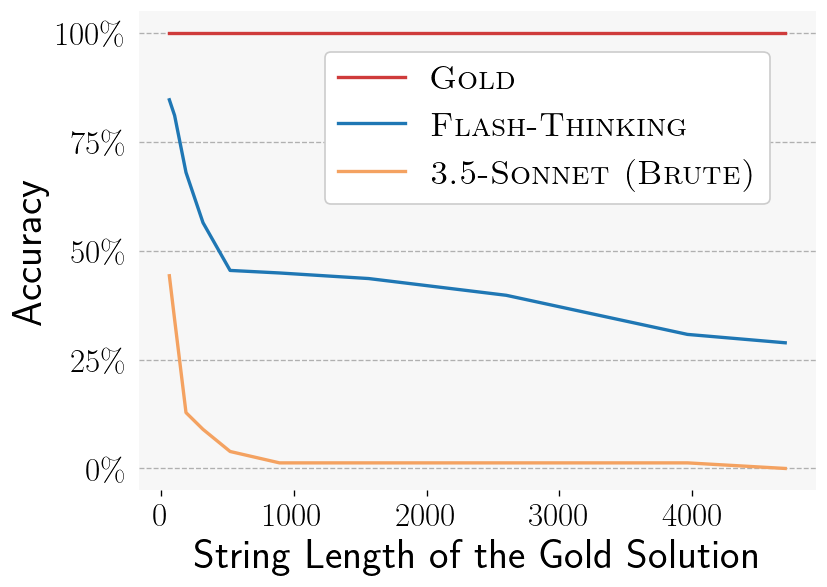

In [ ]:
import numpy as np 
"""

- Goal: study how accuracy varies with problem size 
    - Our metric from problem size: string length of the golden solution 
- Picked 10 easy-ish problems (GeminiThinking-cot has 77.5% on these)
- For each generated 24 variations in a wide range, incl. trivially small and impractically big
- Collected all 240 variations and bucketed into 10 buckets based on quantiles
- Gold: 100% on all lengths -> in principle like a human, size does not matter 
- Claude Brute Force: Can only solve very small ones (<100)
- Gemini Cot: The original 77.5% is 100% for trivial ones, but eventually drops to 40% -> output size/complexity matters even when you know the solution
- => This is why in our problem review \cref{review} we explicitly reviewed for bruteforceability and too high output size

data.txt obtained with:
uv run python src/scripts/analyze.py --run logs/lengthstudy --lengthstudy --max-variations 24 --problems bxmo-2015-4 serbian-2020-tst-4 swiss-2018-8-selection usamo-2006-2 imo-shortlist-2008-a2 imo-shortlist-2014-c3 dutch-2010-4 dutch-2024-2 imc-2012-2 imc-2013-3

"""

model_mapper = {
    "gold": r"\textsc{Gold}",
    "gemini": r"\textsc{Flash-Thinking}",
    "claude": r"\textsc{3.5-Sonnet (Brute)}",
}

lens = []
oks = {
    "gold": [],
    "gemini": [],
    "claude": []
}

palette_colors = [
    "#cf3b3b",
    "#1f77b4",
    "#F4A261",  # Warm Orange
    # "#2A9D8F",  # Teal
]
with open("../logs/lengthstudy/data.txt", "r") as f:
    lines = f.readlines()
    for i in range(len(lines)):
        # all variants together 
        if lines[i].startswith("variant"):
            toks = lines[i].split(",")
            L = int(toks[1].strip().split("::")[1].strip())
            oks["gold"].append((L, int(toks[2].strip().split("::")[1])))
            oks["gemini"].append((L, int(toks[3].strip().split("::")[1])))
            oks["claude"].append((L, int(toks[4].strip().split("::")[1])))
            lens.append(L)

lens = sorted(lens)
buckets_left = [0]
for i in range(1, 11):
    buckets_left.append(np.percentile(lens, i * 10))

xs = {k: [] for k in oks.keys()}
ys = {k: [] for k in oks.keys()}
for i in range(len(buckets_left)-1):
    L = buckets_left[max(i - 1, 0)] 
    R = buckets_left[min(i+2, len(buckets_left)-1)]
    for k in oks.keys():
        valid = [x for x in oks[k] if x[0] > L and x[0] <= R]
        if len(valid) > 0:
            Ls, Oks = zip(*valid)
            xs[k].append(np.mean(Ls))
            ys[k].append(np.mean(Oks))
            if k == "gold":
                print(f"For k={k} and bucket {i}: {len(valid)}")

fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

for k in oks.keys():
    ax.plot(xs[k], np.array(ys[k]) * 100, label=model_mapper[k], linewidth=2, color=palette_colors.pop(0))

plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)

sns.despine(left=True, bottom=True)
ax.set_facecolor((0.97,0.97,0.97))

ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
ax.set_yticks((0, 25, 50, 75, 100))
ax.set_yticklabels([f'${i}\%$' for i in (0, 25, 50, 75, 100)])
ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements
plt.tick_params(axis='y', which='both', left=False, right=False)
leg = ax.legend(title='', fontsize=20, bbox_to_anchor=(0.25, 0.95))
leg.get_frame().set_alpha(1)

ax.set_xlabel(r"String Length of the Gold Solution", fontsize=25)
ax.set_ylabel("Accuracy", fontsize=25)
# ax.set_xscale('log')
fig.tight_layout()
fig.savefig('lengthstudy.pdf', bbox_inches='tight')

<>:25: SyntaxWarning: invalid escape sequence '\#'
<>:25: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_1436547/3881694564.py:25: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel("\# of Problems", fontsize=25)


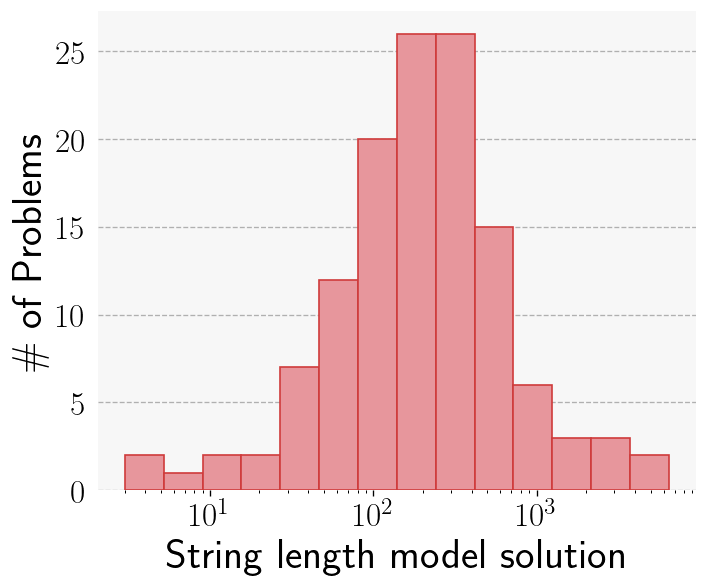

In [ ]:
data_barplot = [3, 3, 7, 11, 15, 22, 23, 28, 28, 29, 31, 39, 39, 44, 55, 57, 60, 62, 63, 64, 66, 67, 70, 71, 75, 77, 81, 84, 85, 90, 91, 91, 94, 96, 96, 100, 100, 101, 111, 116, 117, 122, 122, 123, 125, 136, 140, 141, 144, 150, 152, 159, 161, 161, 165, 168, 168, 173, 184, 185, 186, 192, 198, 201, 202, 208, 210, 215, 217, 227, 237, 240, 261, 261, 261, 264, 268, 269, 282, 288, 290, 311, 316, 320, 332, 338, 351, 354, 357, 367, 371, 372, 373, 385, 387, 404, 405, 416, 417, 419, 440, 443, 444, 445, 465, 476, 510, 600, 605, 608, 623, 651, 710, 784, 1045, 1080, 1150, 1155, 1167, 1260, 1479, 1735, 2380, 2889, 2994, 4008, 6455]

fig, ax = plt.subplots(figsize=(6, 5), dpi=120)

colors = ["#cf3b3b", "#e7969c"]
ax.set_xscale('log')
# dont show the ugly black outlines
sns.histplot(data=pd.DataFrame({"x": data_barplot}), x="x", color=colors[1], alpha=1, ax=ax,
             # remove outlines
             edgecolor=colors[0], linewidth=1) 


plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)

sns.despine(left=True, bottom=True)
ax.set_facecolor((0.97,0.97,0.97))

ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements

plt.tick_params(axis='y', which='both', left=False, right=False)

ax.set_xlabel("String length model solution", fontsize=25)
ax.set_ylabel("\# of Problems", fontsize=25)
fig.tight_layout()
fig.savefig('histogram_length.pdf', bbox_inches='tight')

<>:49: SyntaxWarning: invalid escape sequence '\%'
<>:54: SyntaxWarning: invalid escape sequence '\#'
<>:49: SyntaxWarning: invalid escape sequence '\%'
<>:54: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_1436547/934669302.py:49: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels([f'${i}\%$' for i in (0, 20, 40, 60, 80, 100)])
/tmp/ipykernel_1436547/934669302.py:54: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('\# of Output Tokens', fontsize=22)


<Figure size 640x480 with 0 Axes>

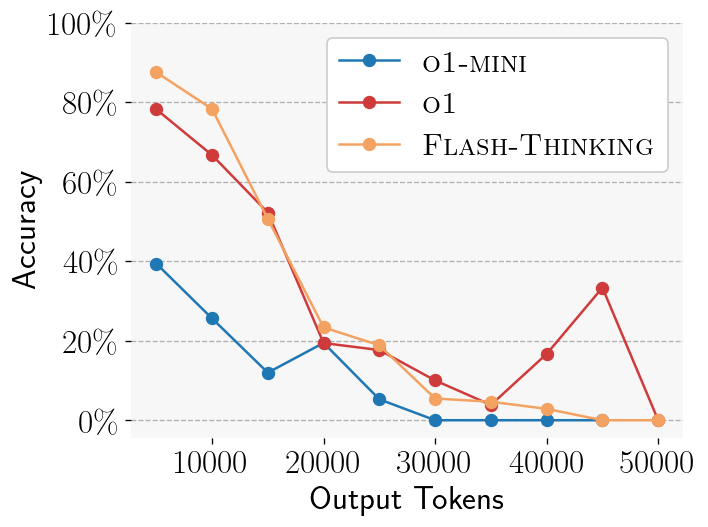

In [ ]:
import matplotlib.pyplot as plt
tokens = json.load(open('../data/tokens.json', 'r'))
w = 5000

models = ["o1-mini", "o1", "gemini-2.0-flash-thinking-exp"]
model_mapper = {
    "o1-mini": r"\textsc{o1-mini}",
    "o1": r"\textsc{o1}",
    "gemini-2.0-flash-thinking-exp": r"\textsc{Flash-Thinking}",
}

palette_colors = [
    "#1f77b4",
    "#cf3b3b",
    "#F4A261",  # Warm Orange
    # "#2A9D8F",  # Teal
]

def plot_tokens(plot_type):
    plt.clf()
    fig, ax = plt.subplots(figsize=(6, 4.5), dpi=120)
    if plot_type == "pct_overall":
        ax.set_yscale("log")

    violinplot_data = []
    models_data = []
    for color, model in zip(palette_colors, models):
        x, y, y2 = [], [], []
        for i in range(10):
            cnt_corr = sum([1 for tok in tokens[model + "-correct"] if w * i < tok <= w * (i + 1) ])
            cnt_wrong = sum([1 for tok in tokens[model + "-wrong"] if w * i < tok <= w * (i + 1) ])
            if cnt_corr + cnt_wrong == 0:
                break
            x.append(w * (i+1))
            y.append(cnt_corr/(cnt_corr + cnt_wrong) * 100)
            y2.append((cnt_corr+cnt_wrong) * 100)
        violinplot_data += tokens[model + "-wrong"] + tokens[model + "-correct"]
        models_data += [model_mapper[model]] * len(tokens[model + "-wrong"]) + [model_mapper[model]] * len(tokens[model + "-correct"])
        if plot_type == "pct_correct":
            ax.plot(x, y, label=model_mapper[model], marker='o', markersize=7, color=color)

    if plot_type == "pct_overall":
        sns.violinplot(x=models_data, y=violinplot_data, ax=ax, palette=palette_colors, alpha=1)

    if plot_type == "pct_correct":
        ax.set_ylabel('Accuracy', fontsize=20)
        ax.set_xlabel('Output Tokens', fontsize=20)
        ax.set_yticks((0, 20, 40, 60, 80, 100))
        ax.set_yticklabels([f'${i}\%$' for i in (0, 20, 40, 60, 80, 100)])
        # ax.set_xscale("log")
        leg = ax.legend(title='', fontsize=18, loc="upper right")
        leg.get_frame().set_alpha(1)
    elif plot_type == "pct_overall":
        ax.set_ylabel('\# of Output Tokens', fontsize=22)
        ax.set_xlabel('Model Name', fontsize=22)
        ax.set_yticks((10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6))
        ax.set_ylim(10 ** 2 - 1, 10 ** 6 + 100)
        # ax.set_yticks((10 ** 3, 10 ** 4, 10 ** 5))
        # ax.set_yticklabels([f'{i}\%' for i in (0, 10, 20, 30, 40)])
        # ax.legend(title='', fontsize=18, loc="upper left")
    
    sns.despine(left=True, bottom=True)
    ax.set_facecolor((0.97,0.97,0.97))

    plt.tick_params(axis='y', which='major', labelsize=20)
    plt.tick_params(axis='x', which='major', labelsize=20)

    ax.grid(axis='y', linestyle='--', alpha=1)  # Light dashed horizontal lines
    ax.set_axisbelow(True)  # Ensure gridlines are drawn below all other plot elements

    # plt.tick_params(axis='y', which='both', left=False, right=False)
    fig.savefig(f'tokens_{plot_type}.pdf', bbox_inches='tight')

    
    
    fig.tight_layout()

plot_tokens("pct_correct")

/tmp/ipykernel_1436547/934669302.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=models_data, y=violinplot_data, ax=ax, palette=palette_colors, alpha=1)


<Figure size 640x480 with 0 Axes>

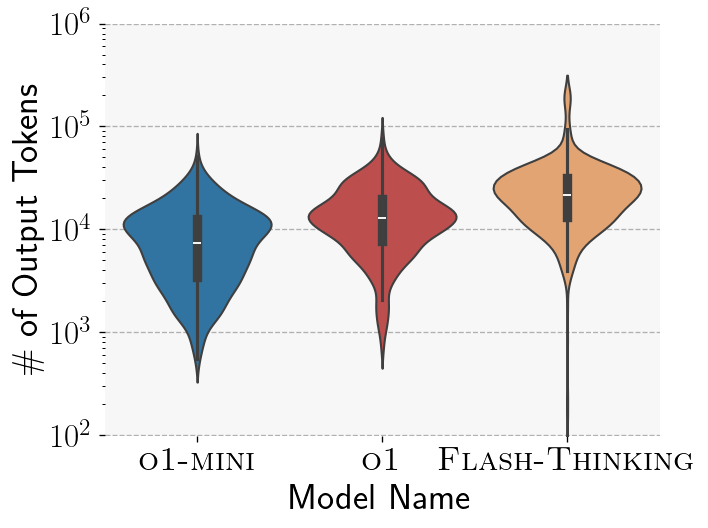

In [74]:
plot_tokens("pct_overall")